In [1]:


import pandas as pd
from helm.benchmark.runner import InstanceGenerations,GenerationSummary
from typing import Any, List
import json
from helm.common.request import (GeneratedOutput, Token)

import PostMetric
import pandas as pd

from helm.benchmark.metrics.statistic import Stat
from typing import Dict, Optional

from helm.benchmark.augmentations.perturbation_description import (
    PerturbationDescription)
from dataclasses import dataclass
from process_gens import *
from process_gen_utils import *
from calculate_metrics import Calculate_Metrics





#wmt modes

process_gen_modes=["wmt_samples5", "wmt_samples3", "wmt_samples0", "wmt_samples1", "wmt_samples2_1","wmt_samples2_2"]

dfs_by_model,processGens,(root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric)= get_dfs_by_model(process_gen_modes)
examples_df = pd.concat(list(dfs_by_model.values()))

# processGens=ProcessGens()
# processGens.init_with_mode(process_gen_modes)
# root_folder, num_beams_list, models, custom_metrics, task_names, suite_name, instance_metrics, compare_metric = processGens.get_params()
# examples_df, completions_df=get_dfs(processGens)


# dfs_by_model={}
# for model_name in examples_df['model'].unique():
#     filtered_df = examples_df[examples_df["model"]==model_name]
#     dfs_by_model[model_name]=filtered_df
# all_dfs_by_model=dfs_by_model




/opt/miniconda3/envs/crfm-helm2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
PyTorch version 2.6.0 available.


In [2]:
# print(f"\t root_folder: {root_folder} \n \t num_beams_list {num_beams_list} \n \t models: {models} \n \t custom_metrics{[metric.name() for metric in custom_metrics]}"+ 
#     f"\n \t task_names {task_names} \n \t suite_name {suite_name} \n \t instance_metrics {instance_metrics}")
# # instanceGeneration=get_first(processGens.first_run_instances)
# print(examples_df.head(2))
# print("num examples" ,len(examples_df))
# print("num_completions", len(completions_df))
# print(f"compare_metric mean: ",examples_df[[compare_metric]].mean())
# #current belief: for each run_folder combo, there will be 100 instances and 100 examples per instance

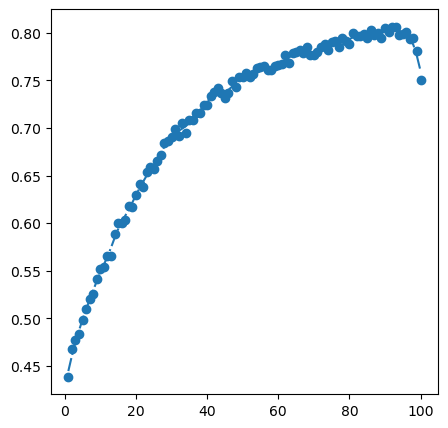

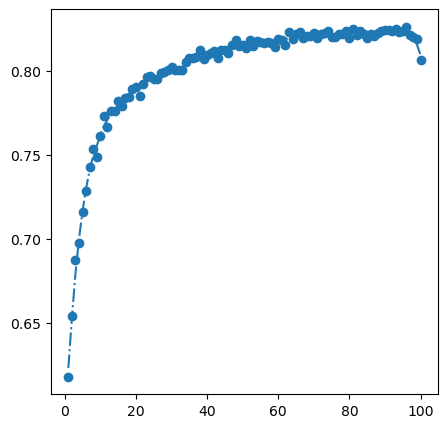

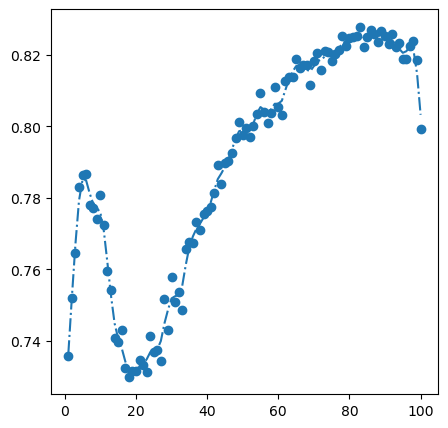

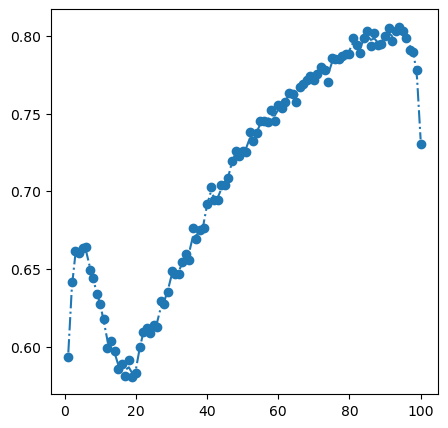

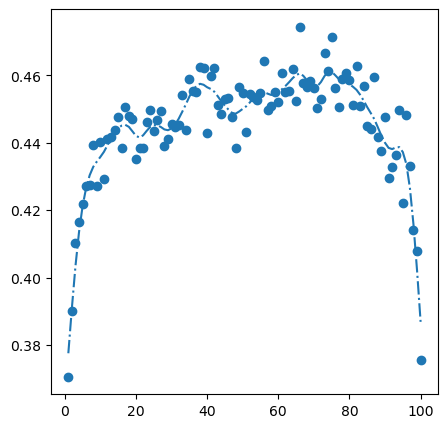

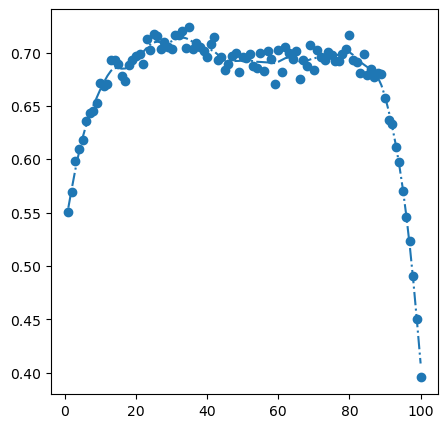

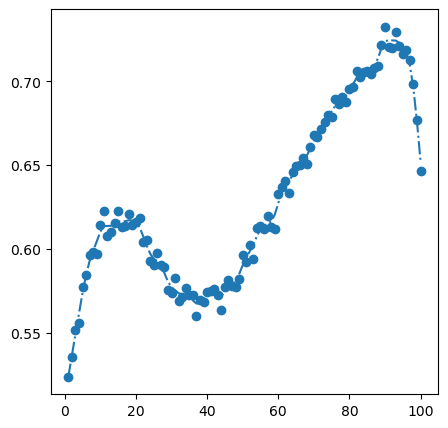

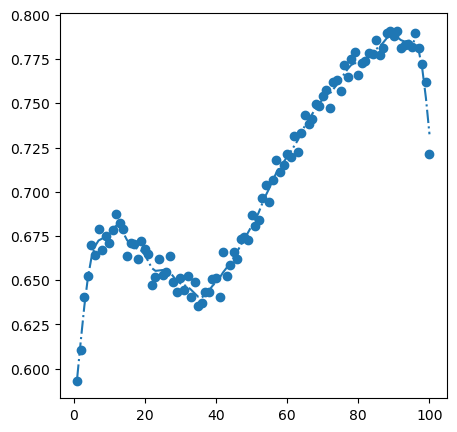

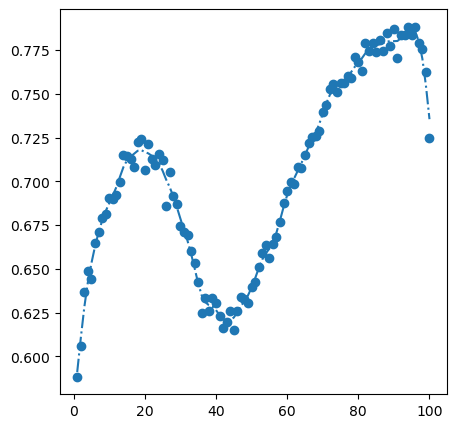

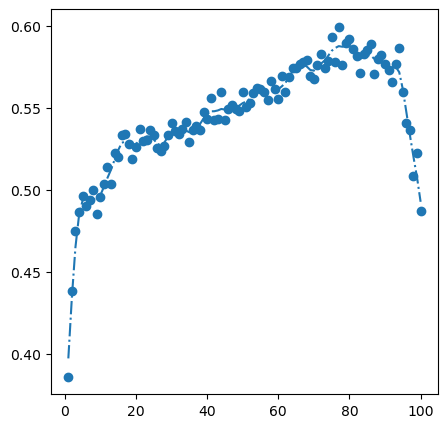

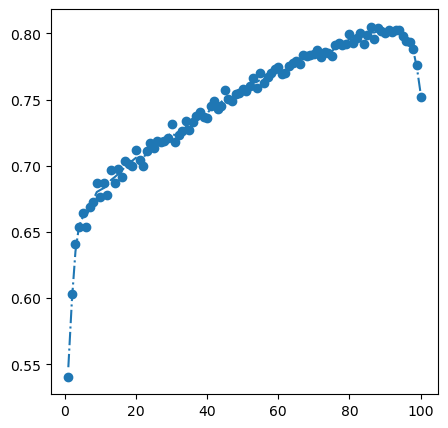

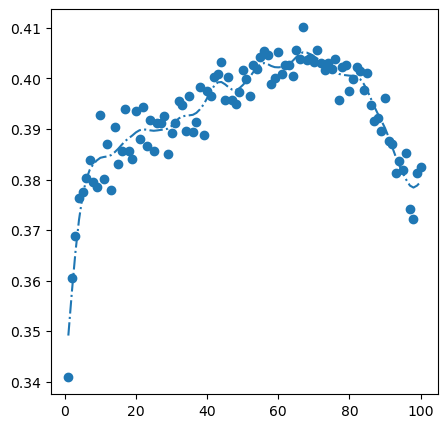

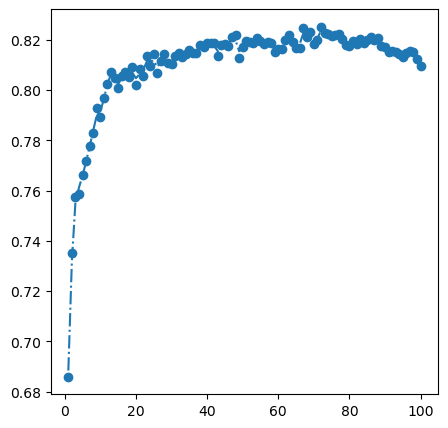

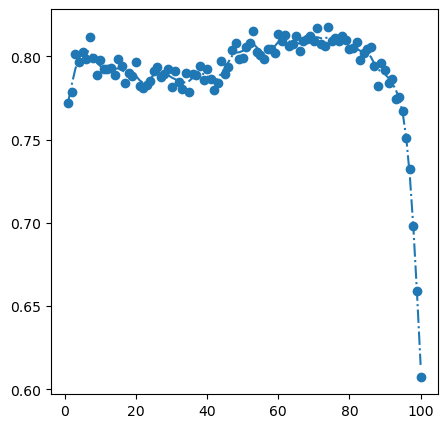

In [3]:

max_example_idx = examples_df["example_idx"].max()
plots_wide=1
num_models=len(dfs_by_model.keys())
plots_tall=math.ceil(num_models/plots_wide)

suptitle=""
axs=None
fig=None


for idx, (model_name, filtered_df) in enumerate(dfs_by_model.items()):
    filtered_df["rank"]=100-filtered_df["example_idx"]
    if axs is None:
        ax=None
    else:
        title=model_name
        if(num_models>1):
            axs_x=idx % plots_wide
            axs_y= math.floor(idx / plots_wide)
            ax=axs[axs_x, axs_y]
        else:
            ax=axs

    
    def calculate_title():
        return f"{model_name}: {suptitle}" if ax is None else model_name
    # plot by rank within sentence
    suptitle="Grouped by rank within sentence"
    plot_smooth_spline(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax, figsize=(5,5))   
if fig is not None:
    fig.suptitle(title)
    fig.tight_layout()
    

In [4]:

def get_model_details(model_name):


    info_dict={
        #olmo
        "allenai_OLMo_2_0425_1B_Instruct":{"size": 1, "suite":  "olmo","model_type":"instruct", "name":"Olmo 1B Instruct"},
        "allenai_OLMo_2_0425_1B":{"size": 1, "suite":  "olmo","model_type":"base", "name":"Olmo 1B Base"},

        "allenai_OLMo_2_1124_7B_Instruct":{"size": 7, "suite":  "olmo","model_type":"instruct", "name":"Olmo 7B Instruct" },
        "allenai_OLMo_2_1124_7B":{"size": 7, "suite":  "olmo","model_type":"base", "name":"Olmo 7B Base" },

        "allenai_OLMo_2_1124_13B_Instruct":{"size": 13, "suite":  "olmo","model_type":"instruct", "name":"Olmo 13B Instruct" },
        "allenai_OLMo_2_1124_13B":{"size": 13, "suite":  "olmo","model_type":"base", "name":"Olmo 13B Base" },

        #llama instruct
        "meta_llama_Llama_3.2_1B_Instruct":{"size": 1, "suite": "llama","model_type":"instruct",  "name":"Llama 1B Instruct"},
        "meta_llama_Llama_3.2_1B":{"size": 1, "suite": "llama","model_type":"base",  "name":"Llama 1B Base"},

        "meta_llama_Llama_3.1_8B_Instruct":{"size": 8, "suite": "llama","model_type":"instruct",  "name":"Llama 8B Instruct"},
        "meta_llama_Llama_3.1_8B":{"size": 8, "suite": "llama","model_type":"base",  "name":"Llama 8B Base"},

        


        "meta-llama/Meta-Llama-3-70B-Instruct":{"size": 70, "suite": "llama","model_type":"instruct",  "name":"Llama 70B Instruct"},
        "allenai/OLMo-2-0325-32B-Instruct":{"size": 32, "suite": "olmo","model_type":"base",  "name":"Olmo 32 Base"},

        # #compare types
        "allenai_OLMo_2_1124_7B_DPO":{"size": 7, "suite":  "olmo","model_type":"dpo", "name":"Olmo 7B DPO" },
        "allenai_OLMo_2_1124_7B_SFT":{"size": 7, "suite":  "olmo","model_type":"sft", "name":"Olmo 7B SFT" },

        "allenai_OLMo_2_1124_13B_DPO":{"size": 13, "suite":  "olmo","model_type":"dpo", "name":"Olmo 13B DPO" },
        "allenai_OLMo_2_1124_13B_SFT":{"size": 13, "suite":  "olmo","model_type":"sft", "name":"Olmo 13B SFT" },

        "allenai_OLMo_2_1124_13B_DPO":{"size": 13, "suite":  "olmo","model_type":"dpo", "name":"Olmo 13B DPO" },
        "allenai_OLMo_2_1124_13B_SFT":{"size": 13, "suite":  "olmo","model_type":"sft", "name":"Olmo 13B SFT" },

        "Qwen_Qwen3_0.6B":{"size": 0.6, "suite":  "qwen","model_type":"base", "name":"Qwen 0.6B" },
        "Qwen_Qwen3_1.7B":{"size": 1.7, "suite":  "qwen","model_type":"base", "name":"Qwen 1.7B" },
        "Qwen_Qwen3_4B":{"size": 4, "suite":  "qwen","model_type":"base", "name":"Qwen 4B" },
        "Qwen_Qwen3_8B":{"size": 8, "suite":  "qwen","model_type":"base", "name":"Qwen 8B" },


        
    }
    
    return info_dict[model_name]


In [5]:

# #compare sizes
# ["meta_llama_Llama_3.2_1B_Instruct","meta_llama_Llama_3.1_8B"]
# ["allenai_OLMo_2_0425_1B","allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_13B"]

# #compare types
# ["allenai_OLMo_2_1124_13B", "allenai_OLMo_2_1124_13B_Instruct", "allenai_OLMo_2_1124_13B_DPO", "allenai_OLMo_2_1124_13B_SFT"]
# ["allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_7B_Instruct", "allenai_OLMo_2_1124_7B_DPO", "allenai_OLMo_2_1124_7B_SFT"]

# #base vs instruct
# [( "meta_llama_Llama_3.2_1B","meta_llama_Llama_3.2_1B_Instruct")
# ("meta_llama_Llama_3.1_8B","meta_llama_Llama_3.1_8B") 
# ("allenai_OLMo_2_0425_1B","allenai_OLMo_2_0425_1B"),
# ("allenai_OLMo_2_1124_7B","allenai_OLMo_2_1124_7B"),
# ("allenai_OLMo_2_1124_13B","allenai_OLMo_2_1124_13B")]





from scipy.interpolate import make_smoothing_spline
def plot_smooth_spline(df, xlabel, ylabel, groupby='example_idx', title=None, trend_line="None",ax=None, nbins=20, error_bar=False, figsize=None):
    if(ax is None):
        print("AX IS NONE!!")

        figsize=(5, 5) if figsize is None else FloatingPointError
        _, ax = plt.subplots(figsize=figsize)
    warnings.simplefilter(action='ignore', category=FutureWarning)
    if(groupby=="bins"):
        
        df["bins"]=pd.qcut(df[xlabel],nbins)
    
    grouped = df.groupby(groupby)[[xlabel, ylabel]].agg(['mean', 'count', 'std'])
    
    grouped = grouped.sort_values(by=(xlabel, 'mean'))

    x = grouped[(xlabel, 'mean')].values
    y = grouped[(ylabel, 'mean')].values
    

    yerr = grouped[(ylabel, 'std')].values
    yerr=[]
    for i in grouped.index:
        # print(grouped.loc[i][ylabel])
        _, c, s = grouped.loc[i][ylabel]
        yerr.append(1.96*s/math.sqrt(c))

    # Plot with error bars (standard deviation)

    if(error_bar):
        ax.errorbar(x, y, yerr=yerr, fmt='o', ecolor='gray', capsize=3, label='Data with std dev')
    else:
        ax.scatter(x,y)
    spl = make_smoothing_spline(x, y)
    ax.plot(x, spl(x), '-.')
    if title:
        ax.set_title(title)


def qualitative_plots(models_array, figsize=(15,10)):
    
    nrows=len(models_array)
    ncols=max(len(s) for s in models_array)
    _, axes=plt.subplots(nrows=nrows, ncols= ncols, figsize=figsize)
    
    for row, suite_models in enumerate(models_array):
        for col in range(ncols):
            ax=axes[row][col]
            if col < len(suite_models):
                model_name=suite_models[col]
                print(f"model_name is {model_name}")

                filtered_df=dfs_by_model[model_name]
                def calculate_title():
                    readable_model=get_model_details(model_name)['name']
                    return f"{readable_model}: {suptitle}" if ax is None else readable_model
                # plot by rank within sentence
                suptitle="Grouped by rank within sentence"
                ax=plot_grouped(df=filtered_df, xlabel="rank",groupby='example_idx', ylabel=compare_metric, title=calculate_title(), ax=ax, error_bar=False)  
                ax.set_xlabel(None)
                ax.set_ylabel(None)
            else:
                ax.axis('off')

        
    plt.tight_layout()






model_name is allenai_OLMo_2_1124_13B
model_name is allenai_OLMo_2_1124_13B_SFT
model_name is allenai_OLMo_2_1124_13B_DPO
model_name is allenai_OLMo_2_1124_13B_Instruct
model_name is allenai_OLMo_2_1124_7B
model_name is allenai_OLMo_2_1124_7B_SFT
model_name is allenai_OLMo_2_1124_7B_DPO
model_name is allenai_OLMo_2_1124_7B_Instruct


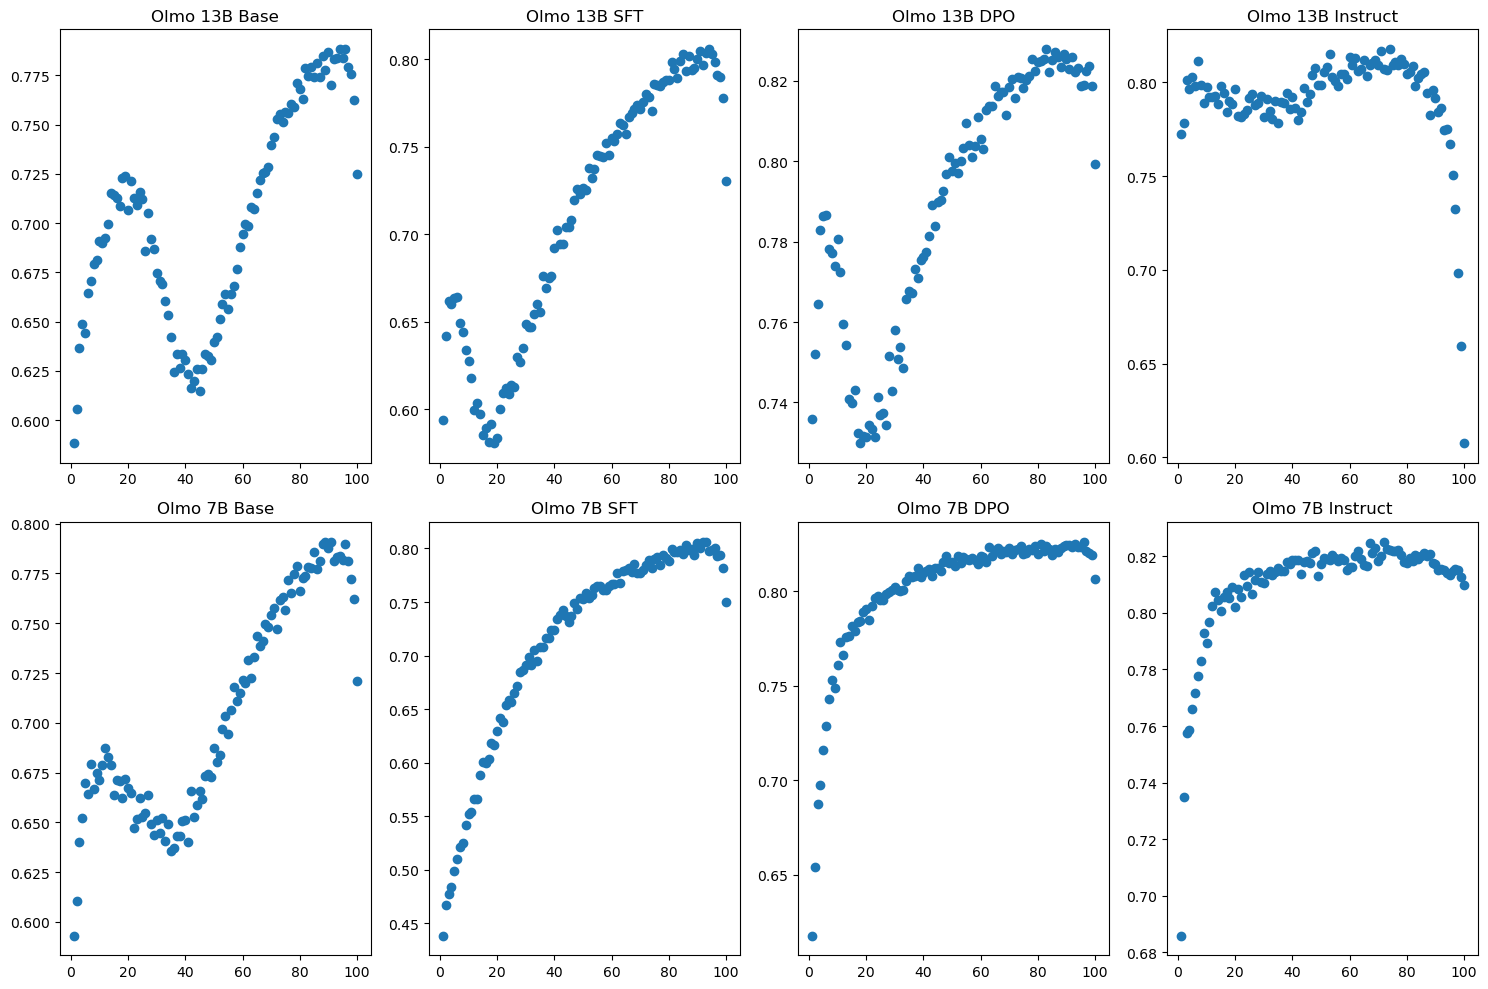

In [13]:
types_array=[["allenai_OLMo_2_1124_13B",  "allenai_OLMo_2_1124_13B_SFT",   "allenai_OLMo_2_1124_13B_DPO","allenai_OLMo_2_1124_13B_Instruct"],
             ["allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_7B_SFT", "allenai_OLMo_2_1124_7B_DPO",  "allenai_OLMo_2_1124_7B_Instruct"]]
qualitative_plots(types_array)


model_name is meta_llama_Llama_3.2_1B
model_name is meta_llama_Llama_3.1_8B
model_name is meta_llama_Llama_3.2_1B_Instruct
model_name is meta_llama_Llama_3.1_8B_Instruct


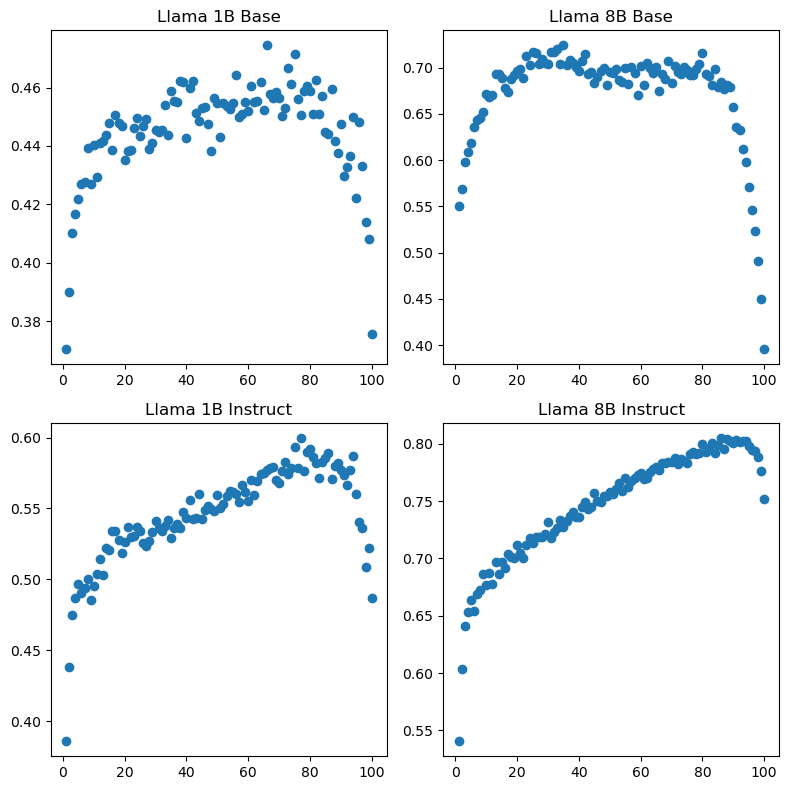

In [48]:


base_models=["meta_llama_Llama_3.2_1B", "meta_llama_Llama_3.1_8B"]

# , "allenai_OLMo_2_0425_1B", "allenai_OLMo_2_1124_7B","allenai_OLMo_2_1124_13B"]


instruct_models=[model+"_Instruct" for model in base_models]

base_and_instruct_models = [base_models, instruct_models]



qualitative_plots(base_and_instruct_models, figsize=(2*4,2*4))






  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                        

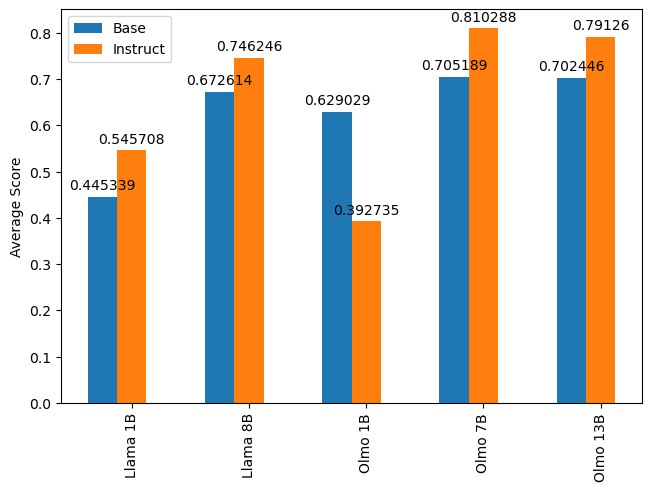

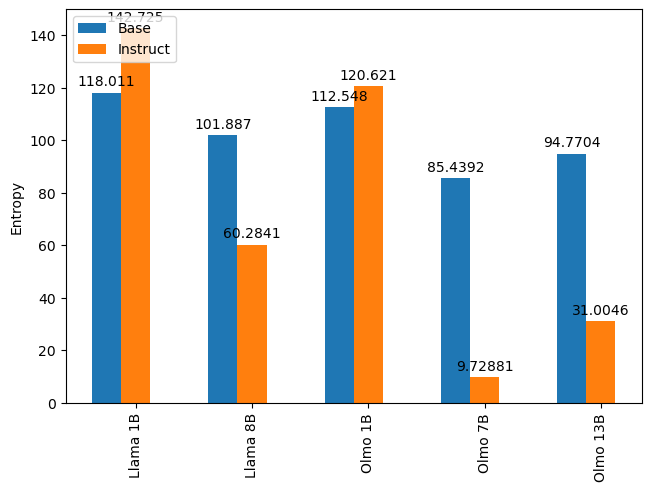

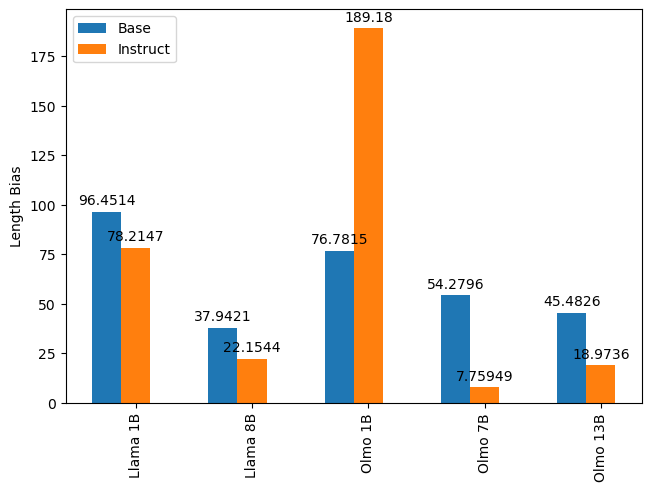

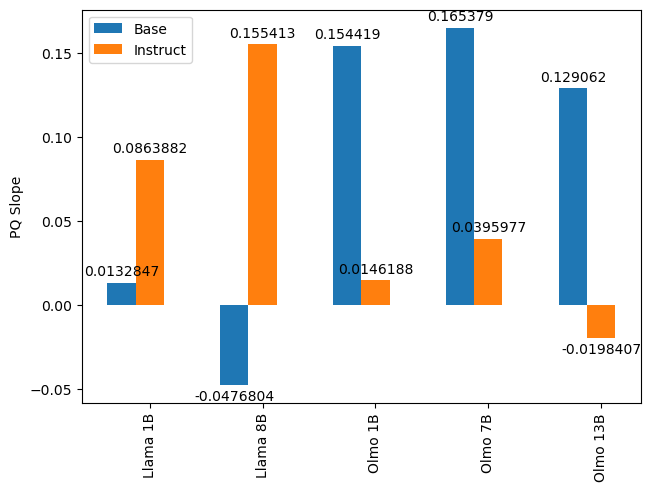

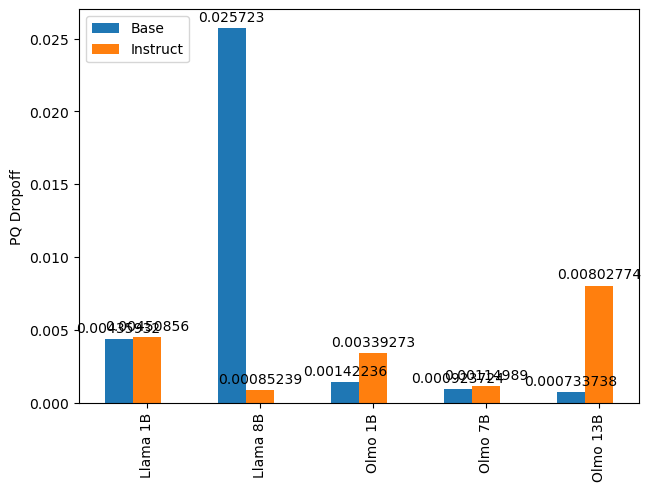

In [11]:
def compare_models_by_type(dfs_by_model, compare_metric,  base_models,  model_types):
    metrics_dict={}
    for base_model in base_models:


        for model_type in model_types:

            model = base_model if model_type=="Base" else f"{base_model}_{model_type}"

            metrics=Calculate_Metrics(dfs_by_model[model], compare_metric).get_best_metrics()
            for metric_name, metric_value in metrics.items():
                if metric_name != "model_name":
                    append_to_dict(metrics_dict, [metric_name, base_model, model_type], metric_value)    
        
    for metric_name, metric_by_model in metrics_dict.items():
        bar_graph_dict={}
        for model_type in model_types:
            bar_graph_dict[model_type]=[]

        model_names = metric_by_model.keys()

        readable_models= [get_model_details(model_name)['name'].replace(" Base", "") for model_name in model_names]
        base_models=[]
        for base_model, metric_by_type in metric_by_model.items():
            base_models.append(base_model)
            for model_type in model_types:
                bar_graph_dict[model_type].append(metric_by_type[model_type])
        x = np.arange(len(model_names))  # the label locations
        width = 0.25  # the width of the bars
        multiplier = 0

        fig, ax = plt.subplots(layout='constrained')

        for attribute, measurement in bar_graph_dict.items():
            offset = width * multiplier
            rects = ax.bar(x + offset, measurement, width, label=attribute)
            ax.bar_label(rects, padding=3)
            multiplier += 1

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(metric_name)
        ax.set_xticks(x + width, readable_models)
        ax.legend(loc='upper left')
        plt.xticks(rotation=90)

        plt.show()




model_types=["Base", "Instruct"]
base_models=["meta_llama_Llama_3.2_1B", "meta_llama_Llama_3.1_8B", "allenai_OLMo_2_0425_1B", "allenai_OLMo_2_1124_7B","allenai_OLMo_2_1124_13B"]
compare_models_by_type(dfs_by_model, compare_metric,  base_models,  model_types)





  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 54% (6 of 11) |#############            | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (11 of 11) |#######################

{'Base': [0.7051886246675254, 0.7024463241338731], 'SFT': [0.71294364887774, 0.7107744899058343], 'DPO': [0.8008868232253193, 0.7894403561010956], 'Instruct': [0.8102876703515652, 0.7912597180572153]}
{'Base': [85.43922407823531, 94.77035414384227], 'SFT': [35.686251768740995, 53.83716996471947], 'DPO': [16.761950720794914, 39.263753862886155], 'Instruct': [9.728811392190755, 31.00463987172673]}
{'Base': [np.float64(54.27955235523554), np.float64(45.48259225922591)], 'SFT': [np.float64(37.56774557455745), np.float64(48.03287488748875)], 'DPO': [np.float64(15.632028802880294), np.float64(21.183587158715877)], 'Instruct': [np.float64(7.759494749474949), np.float64(18.97362256225624)]}
{'Base': [np.float64(0.1653789987784765), np.float64(0.12906216853472563)], 'SFT': [np.float64(0.296443757544149), np.float64(0.23428772206618353)], 'DPO': [np.float64(0.08993028008299404), np.float64(0.09497299618455267)], 'Instruct': [np.float64(0.03959768593831712), np.float64(-0.01984067735525712)]}
{'B

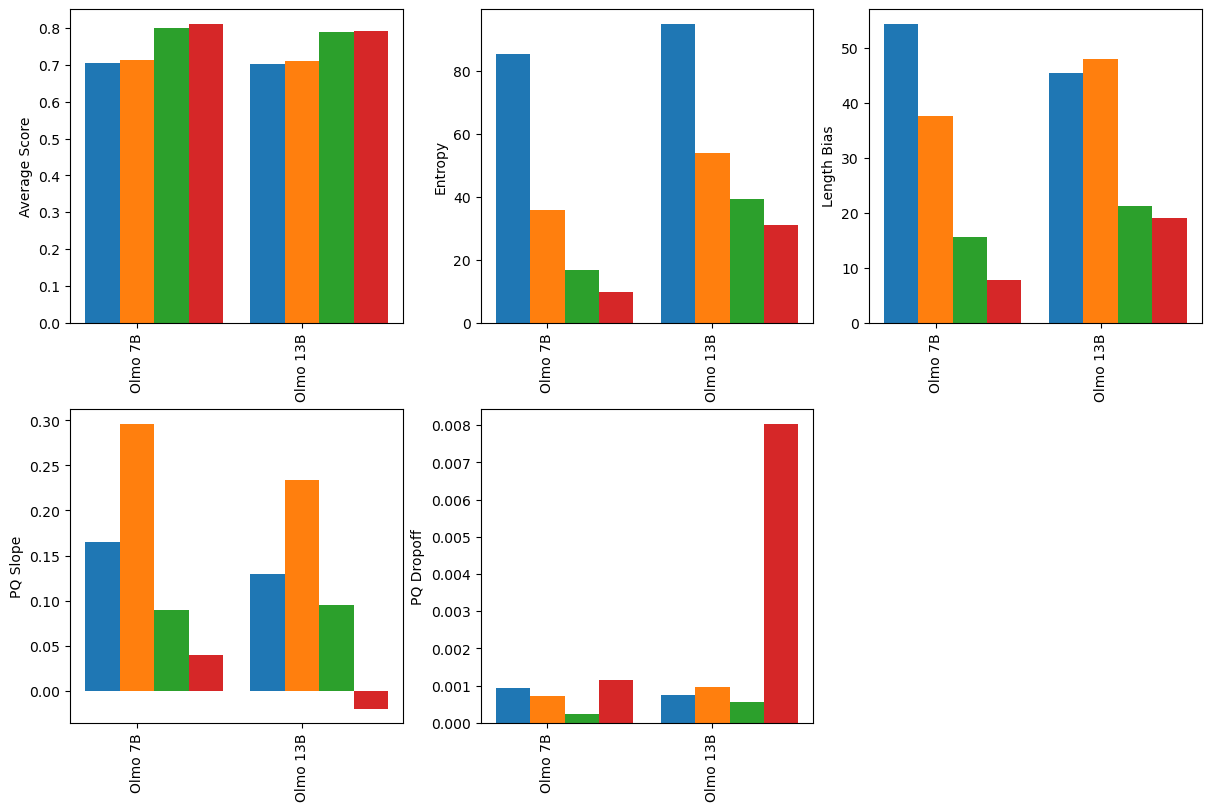

In [46]:
import math
model_types = ["Base", "SFT", "DPO", "Instruct"]
base_models= [ "allenai_OLMo_2_1124_7B", "allenai_OLMo_2_1124_13B"]



def compare_models_by_type(dfs_by_model, compare_metric,  base_models,  model_types):
    metrics_dict={}
    for base_model in base_models:


        for model_type in model_types:

            model = base_model if model_type=="Base" else f"{base_model}_{model_type}"

            metrics=Calculate_Metrics(dfs_by_model[model], compare_metric).get_best_metrics()
            for metric_name, metric_value in metrics.items():
                if metric_name != "model_name":
                    append_to_dict(metrics_dict, [metric_name, base_model, model_type], metric_value)    
        
    ncols=3
    nrows=2
    fig, axes = plt.subplots(nrows, ncols, layout='constrained', figsize=(12,8))

    metric_items = list(metrics_dict.items())
    for row in range(nrows):
        for col in range(ncols):
            ax = axes[row][col]
            if len(metric_items)>0:
                metric_name, metric_by_model = metric_items.pop(0)
                
                
                bar_graph_dict={}
                for model_type in model_types:
                    bar_graph_dict[model_type]=[]

                model_names = metric_by_model.keys()

                readable_models= [get_model_details(model_name)['name'].replace(" Base", "") for model_name in model_names]
                base_models=[]
                for base_model, metric_by_type in metric_by_model.items():
                    base_models.append(base_model)
                    for model_type in model_types:
                        bar_graph_dict[model_type].append(metric_by_type[model_type])
                x = np.arange(len(model_names)) *1.2 # the label locations
                width = 0.25  # the width of the bars
                multiplier = 0

                
                print(bar_graph_dict)
                for attribute, measurement in bar_graph_dict.items():
                    offset = width * multiplier
                    rects = ax.bar(x + offset , measurement, width, label=attribute)
                    # ax.bar_label(rects, padding=3)
                    multiplier += 1
                    # break

                # Add some text for labels, title and custom x-axis tick labels, etc.
                ax.set_ylabel(metric_name)
                ax.set_xticks(x + width, readable_models, rotation=90)
            else:
                ax.axis('off')
    


    plt.show()


#ok, so there are 5 metrics
compare_models_by_type(dfs_by_model, compare_metric,  base_models,  model_types)

